In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df1 = df[df['Country'] == 'United Kingdom']
df1.drop('Country',axis=1,inplace=True)
df1['UnitPrice'] = np.round(df1['UnitPrice']*75)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-3-f03448c266d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['UnitPrice'] = np.round(df1['UnitPrice']*75)


In [4]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
dtype: int64

In [5]:
df1 = df1.dropna()

In [7]:
# remove null values

df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [8]:
# create a revenue column

df1['revenue'] = df1['Quantity']*df1['UnitPrice']

df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,191.0,17850.0,1146.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,254.0,17850.0,1524.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,206.0,17850.0,1648.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,254.0,17850.0,1524.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,254.0,17850.0,1524.0
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,146.0,15804.0,1752.0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,221.0,13113.0,1768.0
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,94.0,13113.0,2256.0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,671.0,13113.0,16104.0


In [9]:
# create a pivot table with columns as stock code, rows as customer_id and values as total quantity purchased.

customer_matrix = df.pivot_table(index='CustomerID',columns='StockCode',values='Quantity',aggfunc='sum')
customer_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# products and quantity purchased for a particular customer_id

customer_matrix.loc[18287].dropna()

StockCode
20961      30.0
20963      30.0
21014      48.0
21232      12.0
21382      18.0
21481       4.0
21556      12.0
21817      36.0
21819      36.0
21823      24.0
21824      72.0
22064      12.0
22065      48.0
22114       4.0
22144       6.0
22306      24.0
22419      12.0
22421      12.0
22582       6.0
22583       6.0
22600      24.0
22603      24.0
22644      12.0
22752       4.0
22753      12.0
22754      12.0
22755      12.0
22756      12.0
22757      12.0
22758      12.0
22807       6.0
22865      12.0
22866      12.0
23076      48.0
23077      20.0
23078      48.0
23223      48.0
23264      48.0
23267      24.0
23269      36.0
23272      12.0
23274      12.0
23310      36.0
23376      48.0
23378      24.0
23445      20.0
35967      36.0
47421      48.0
47422      24.0
84584       6.0
84920       4.0
85173      48.0
72349B     60.0
72351A     24.0
72351B     24.0
84507C      6.0
85039A     96.0
85039B    120.0
85040A     48.0
Name: 18287.0, dtype: float64

In [13]:
# fill null values
d = customer_matrix.fillna(0)



# Cosine Similarity

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It will be used to measure similarity between 2 users based on the items purchased.

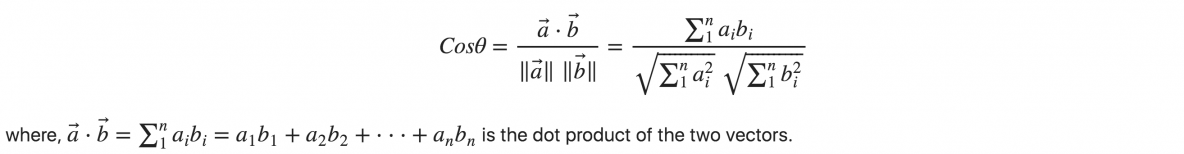

where ||a|| is the Euclidean norm of vector .

Conceptually, it is the length of the vector. 

Similarly, ||b|| is the Euclidean norm of vector b. 

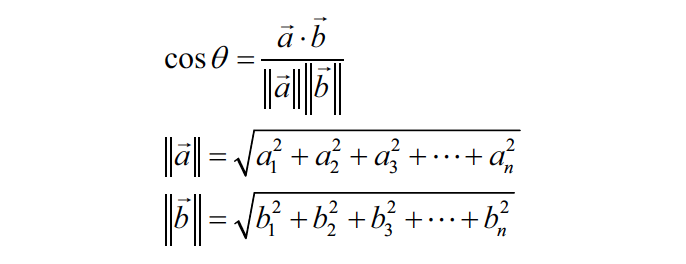

The measure computes the cosine of the angle between vectors a and b. 
This measures the similarity using the cosine of the angle between two vectors in a multidimensional space

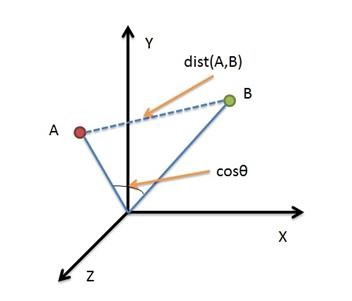

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
# create a data frame measuring the similarity between users.

user_user_df = pd.DataFrame(cosine_similarity(d))

user_user_df['CustomerID'] = customer_matrix.index

user_user_df = user_user_df.set_index('CustomerID')

user_user_df.columns = user_user_df.index

user_user_df

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
12348.0,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
12349.0,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
12350.0,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
18282.0,0.0,0.011921,0.000000,0.014689,0.000000,0.002966,0.0,0.000000,0.007169,0.004772,...,0.0,0.0,0.000000,-0.001372,0.000000,0.000000,0.000000,1.000000,0.003776,0.000000


In [19]:
# select a particular user and then sort most similar users on purchasing similarity.

t = user_user_df.loc[18287].sort_values(ascending=False).head(15)
t

CustomerID
18287.0    1.000000
13295.0    0.406367
16593.0    0.330325
16438.0    0.260285
13271.0    0.244930
15952.0    0.203774
12355.0    0.201498
13005.0    0.198885
16174.0    0.194826
14246.0    0.189299
15434.0    0.186651
15025.0    0.186345
17459.0    0.185488
12425.0    0.184472
14257.0    0.182912
Name: 18287.0, dtype: float64

In [31]:
t.index

Float64Index([18287.0, 13295.0, 16593.0, 16438.0, 13271.0, 15952.0, 12355.0,
              13005.0, 16174.0, 14246.0, 15434.0, 15025.0, 17459.0, 12425.0,
              14257.0],
             dtype='float64', name='CustomerID')

In [30]:
# get the list of stock items bought by a user.

df182 = pd.DataFrame(d.loc[18287])
item_bought_18287 = set(df182.loc[(df182 > 0).any(axis=1)].index)
print(' item bought by user 18287 ')
print(' ')
print(item_bought_18287)
print('  ')

# get the list of stock items bought by next most similar user.

df132 = pd.DataFrame(customer_matrix.loc[13295])
item_bought_13295 = set(df132.loc[(df132 > 0).any(axis=1)].index)
print(' item bought by user 13295 ')
print(' ')
print(item_bought_13295)

 item bought by user 18287 
 
{22144, '85040A', '72349B', 21382, 23310, 22419, '72351A', 22421, 21014, 22807, 23445, '72351B', '84507C', 22306, '85039A', 23076, 23077, 23078, 22064, 22065, 21556, 85173, 22582, 22583, 23223, 21817, 23264, 21819, 84920, 47421, 47422, 21823, 21824, '85039B', 22600, 22603, 23376, 22865, 22866, 23378, 22752, 20961, 22114, 20963, 22753, 22754, 22755, 22756, 22757, 21481, 22758, 23267, 23269, 23272, 23274, 84584, 21232, 22644, 35967}
  
 item bought by user 13295 
 
{'85039A', 21733, '85039B', 22636, 20685, 22834, '72351A', '72351B', 22904, 22905}


In [32]:
# list of items to reccommend to user

item_to_reccomend_to_18287 =  item_bought_13295 - item_bought_18287 

df1.loc[df1['StockCode'].isin(item_to_reccomend_to_18287),['StockCode','Description']].drop_duplicates().set_index('StockCode')

,Description
StockCode,
21733,RED HANGING HEART T-LIGHT HOLDER
20685,DOORMAT RED RETROSPOT
22834,HAND WARMER BABUSHKA DESIGN
22904,CALENDAR PAPER CUT DESIGN
22905,CALENDAR IN SEASON DESIGN
22636,CHILDS BREAKFAST SET CIRCUS PARADE


In [73]:
def fun():
    x = int(input('enter id : '))
    
    dfx = pd.DataFrame(d.loc[x])
    item_bought_x = np.array(dfx.loc[(dfx > 0).any(axis=1)].index)
    
    t = user_user_df.loc[x].sort_values(ascending=False).head(3)
    
    index = []
    for i in t.index:
        dfi = pd.DataFrame(customer_matrix.loc[i])
        item_bought_i = set(dfi.loc[(dfi > 0).any(axis=1)].index)
        index.append(item_bought_i)
        
    index2 = []
    
    for i in index:
        for j in i:
            index2.append(j)
    
    item_to_reccomend_to_x =  set(index2) - set(item_bought_x)
    
    
    print(df1.loc[df1['StockCode'].isin(item_to_reccomend_to_x),['StockCode','Description']].drop_duplicates().set_index('StockCode'))

In [74]:
fun()

enter id : 18287
                                   Description
StockCode                                     
84029G     KNITTED UNION FLAG HOT WATER BOTTLE
22622           BOX OF VINTAGE ALPHABET BLOCKS
21733         RED HANGING HEART T-LIGHT HOLDER
22139         RETROSPOT TEA SET CERAMIC 11 PC 
20685                    DOORMAT RED RETROSPOT
21955        DOORMAT UNION JACK GUNS AND ROSES
21790                       VINTAGE SNAP CARDS
22834              HAND WARMER BABUSHKA DESIGN
22423                 REGENCY CAKESTAND 3 TIER
22904                CALENDAR PAPER CUT DESIGN
22905                CALENDAR IN SEASON DESIGN
22501               PICNIC BASKET WICKER LARGE
22548             HEADS AND TAILS SPORTING FUN
48138                       DOORMAT UNION FLAG
51014A                    FEATHER PEN,HOT PINK
22366                         DOORMAT AIRMAIL 
37446       MINI CAKE STAND WITH HANGING CAKES
22476         EMPIRE UNION JACK TV DINNER TRAY
22636       CHILDS BREAKFAST SET CIRCUS PAR